In [7]:
!pip install nltk.punkt

  Using cached nltk_punkt-0.6.tar.gz (1.2 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for nltk.punkt: filename=nltk_punkt-0.6-py3-none-any.whl size=1337 sha256=1df1d0b993b7d4ac3e29ed7a4dfe9c355d5754c67ab99d214fae27001108fbd0
  Stored in directory: /root/.cache/pip/wheels/19/56/39/cff610b39d76979ecf8d5260fc99c37e9a41bf7da59d481ae3
Successfully built nltk.punkt


In [3]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 809.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [4]:
!pip install torch

In [5]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nombre de concepts ESCO : 1357
Epoch 0, Loss: 0.0076
Epoch 10, Loss: 0.0020
Epoch 20, Loss: 0.0018
Epoch 30, Loss: 0.0018
Epoch 40, Loss: 0.0017
Epoch 50, Loss: 0.0017
Epoch 60, Loss: 0.0016
Epoch 70, Loss: 0.0015
Epoch 80, Loss: 0.0015
Epoch 90, Loss: 0.0014


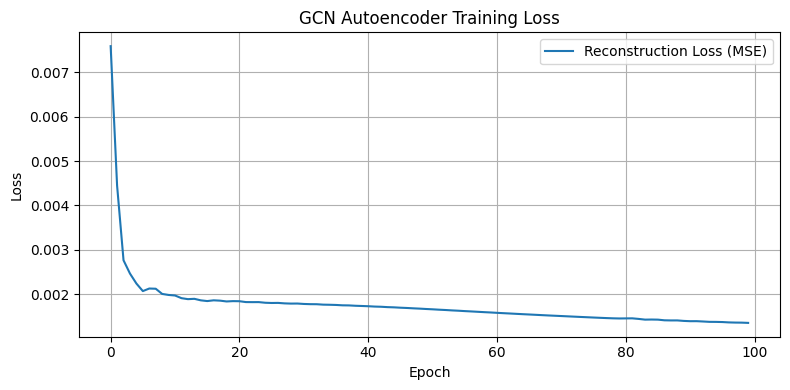

Modèle GCN sauvegardé sous 'gcn_skill_model_2.pt'


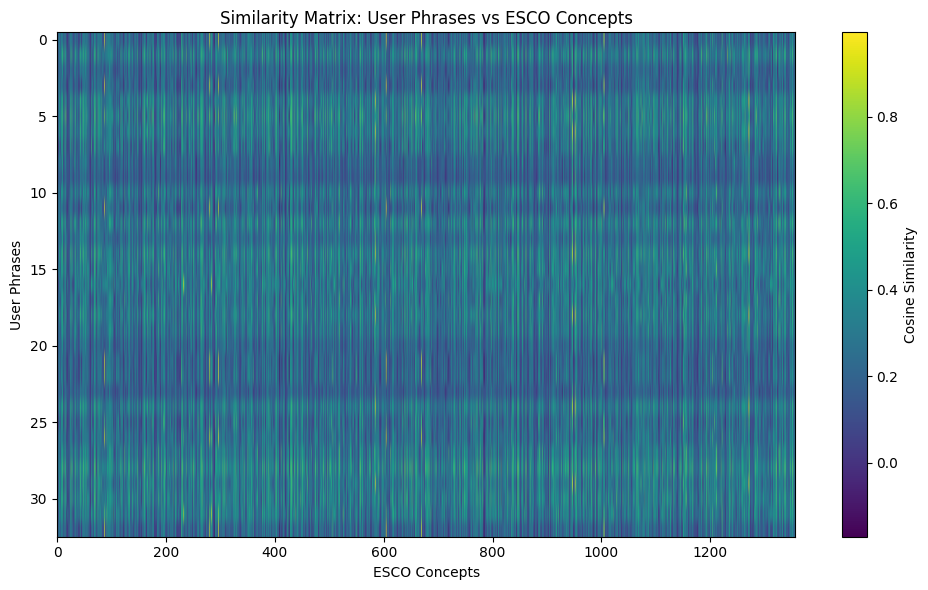


Concepts les plus proches du texte utilisateur :
automation technology - Similarité: 0.9955
architecture regulations - Similarité: 0.9944
install automation components - Similarité: 0.9916
software architecture models - Similarité: 0.9911
design automation components - Similarité: 0.9906
information architecture - Similarité: 0.9900
define software architecture - Similarité: 0.9882
cloud technologies - Similarité: 0.9873
tools for ICT test automation - Similarité: 0.9871
manage ICT data architecture - Similarité: 0.9818


In [8]:
import json
import string
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# ---------------------------
# Charger les concepts ESCO
# ---------------------------
with open("cleaned_IT_data_from_esco.json", "r", encoding="utf-8") as f:
    esco_data = json.load(f)

def extract_titles(entries):
    titles = set()
    for entry in entries:
        for section in ['essential_skills', 'essential_knowledge', 'optional_skills', 'optional_knowledge']:
            for item in entry.get('skills', {}).get(section, []):
                if "title" in item:
                    titles.add(item["title"])
    return list(titles)

if isinstance(esco_data, dict):
    esco_data = [esco_data]

concepts = extract_titles(esco_data)
print(f"Nombre de concepts ESCO : {len(concepts)}")

# ---------------------------
# Nettoyage et N-grams du texte utilisateur
# ---------------------------
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower().translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    return [t for t in tokens if t.isalpha() and t not in stop_words]

def generate_ngrams(tokens):
    phrases = set()
    for n in [3, 2, 1]:
        for gram in ngrams(tokens, n):
            phrase = " ".join(gram)
            if phrase.strip():
                phrases.add(phrase)
    return list(phrases)

long_text = """I have experience in cloud architecture, Kubernetes, Terraform, and automation pipelines with GitLab CI/CD and monitoring with Prometheus and Grafana."""
tokens = clean_text(long_text)
user_phrases = generate_ngrams(tokens)

# ---------------------------
# TF-IDF Similarity
# ---------------------------
all_texts = user_phrases + concepts
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(all_texts).toarray()

n_user = len(user_phrases)
n_concepts = len(concepts)
N = n_user + n_concepts

X_tfidf = torch.tensor(X, dtype=torch.float)

# ---------------------------
# Graphe biparti A
# ---------------------------
A = torch.zeros((N, N))
similarities = cosine_similarity(X[:n_user], X[n_user:])
for i in range(n_user):
    for j in range(n_concepts):
        A[i][n_user + j] = similarities[i][j]
        A[n_user + j][i] = similarities[i][j]

A_hat = A + torch.eye(N)
D_hat = torch.diag(torch.sum(A_hat, axis=1) ** -0.5)
A_norm = D_hat @ A_hat @ D_hat

# ---------------------------
# GCN AutoEncoder
# ---------------------------
class GCNEncoder(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super().__init__()
        self.fc1 = nn.Linear(in_feats, hidden_feats)
        self.fc2 = nn.Linear(hidden_feats, out_feats)

    def forward(self, X, A):
        H = A @ self.fc1(X)
        H = F.relu(H)
        H = A @ self.fc2(H)
        return H

class GCNDecoder(nn.Module):
    def __init__(self, in_feats, out_feats):
        super().__init__()
        self.fc = nn.Linear(in_feats, out_feats)

    def forward(self, Z):
        return self.fc(Z)

encoder = GCNEncoder(X.shape[1], 128, 64)
decoder = GCNDecoder(64, X.shape[1])

# ---------------------------
# Entraînement auto-supervisé
# ---------------------------
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.01)

loss_history = []
for epoch in range(100):
    encoder.train()
    decoder.train()
    Z = encoder(X_tfidf, A_norm)
    X_recon = decoder(Z)
    loss = F.mse_loss(X_recon, X_tfidf)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 🔥 Plot: Courbe de loss
plt.figure(figsize=(8, 4))
plt.plot(loss_history, label="Reconstruction Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("GCN Autoencoder Training Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Sauvegarde modèle
# ---------------------------
torch.save(encoder.state_dict(), "gcn_skill_model_2.pt")
print("Modèle GCN sauvegardé sous 'gcn_skill_model_2.pt'")

# ---------------------------
# Embeddings et concepts similaires
# ---------------------------
encoder.eval()
Z = encoder(X_tfidf, A_norm)
user_emb = Z[:n_user]
concept_emb = Z[n_user:]

sim_matrix = cosine_similarity(user_emb.detach().numpy(), concept_emb.detach().numpy())
concept_scores = np.max(sim_matrix, axis=0)

# 🔥 Plot: Heatmap des similarités
plt.figure(figsize=(10, 6))
plt.imshow(sim_matrix, aspect='auto', cmap='viridis')
plt.colorbar(label="Cosine Similarity")
plt.title("Similarity Matrix: User Phrases vs ESCO Concepts")
plt.xlabel("ESCO Concepts")
plt.ylabel("User Phrases")
plt.tight_layout()
plt.show()

# Top-k concepts
top_k = 10
top_indices = np.argsort(concept_scores)[::-1][:top_k]
top_concepts = [(concepts[i], concept_scores[i]) for i in top_indices]

print("\nConcepts les plus proches du texte utilisateur :")
for concept, score in top_concepts:
    print(f"{concept} - Similarité: {score:.4f}")

np.savez("gcn_data.npz", X_tfidf=X_tfidf.numpy(), A_norm=A_norm.numpy(), n_user=n_user, concepts=concepts)


In [9]:
import json
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

# -----------------------
# Étape 1: Charger les données ESCO et prétraiter
# -----------------------
with open("cleaned_IT_data_from_esco.json", "r", encoding="utf-8") as f:
    esco_data = json.load(f)

job_titles = []
job_skills_texts = []
job_skills_lists = []  # Pour stocker les compétences sous forme de liste
job_skills_importance = []  # Pour stocker l'importance de chaque compétence

for entry in esco_data:
    title = entry.get("title", "")
    skills_section = entry.get("skills", {})

    all_skills = []
    skills_with_importance = {}

    # Attribuer des poids différents selon le type de compétence
    importance_weights = {
        "essential_skills": 1.5,
        "essential_knowledge": 1.3,
        "optional_skills": 0.8,
        "optional_knowledge": 0.6
    }

    for category in ["essential_skills", "optional_skills", "essential_knowledge", "optional_knowledge"]:
        weight = importance_weights[category]
        for skill in skills_section.get(category, []):
            if "title" in skill:
                skill_title = skill["title"]
                all_skills.append(skill_title)
                skills_with_importance[skill_title] = weight

    if all_skills:  # Éviter les emplois sans compétences
        job_titles.append(title)
        # Créer un texte enrichi qui répète les compétences essentielles pour augmenter leur poids
        enhanced_text = []
        for skill, importance in skills_with_importance.items():
            # Répéter les compétences importantes
            repetitions = int(importance * 2)
            enhanced_text.extend([skill] * repetitions)

        job_skills_texts.append(", ".join(enhanced_text))
        job_skills_lists.append(all_skills)
        job_skills_importance.append(skills_with_importance)

print(f"{len(job_titles)} métiers chargés depuis ESCO.")

# -----------------------
# Étape 2: Générer les embeddings pour chaque métier avec preprocessing
# -----------------------
model = SentenceTransformer("all-mpnet-base-v2")

# Générer des embeddings pour chaque compétence individuelle
skill_to_embedding = {}
all_unique_skills = set()
for skills in job_skills_lists:
    all_unique_skills.update(skills)

for skill in all_unique_skills:
    skill_to_embedding[skill] = model.encode(skill, convert_to_numpy=True)

# Générer des embeddings pour les descriptions complètes des métiers
job_embeddings = model.encode(job_skills_texts, convert_to_numpy=True)

# -----------------------
# Étape 3: Fonction améliorée de prédiction de métier
# -----------------------
def predire_metier_depuis_skills(user_skills, threshold=0.5):
    """
    Prédit le métier le plus approprié basé sur les compétences de l'utilisateur

    Args:
        user_skills: liste de compétences de l'utilisateur (ex: ['Python', 'data analysis'])
        threshold: seuil minimal de similarité pour qu'une compétence soit considérée comme correspondante

    Returns:
        Un dictionnaire contenant les métiers prédits et les scores
    """
    # 1. Première approche - Similarité du texte complet
    user_text = ", ".join(user_skills)
    user_embedding = model.encode([user_text], convert_to_numpy=True)
    similarities_text = cosine_similarity(user_embedding, job_embeddings)[0]

    # 2. Deuxième approche - Comparer chaque compétence individuellement
    individual_skill_scores = []

    for i, job_skills in enumerate(job_skills_lists):
        job_importance = job_skills_importance[i]
        matching_score = 0
        total_weight = 0

        # Encoder les compétences de l'utilisateur
        user_skill_embeddings = [model.encode(skill, convert_to_numpy=True) for skill in user_skills]

        # Pour chaque compétence du métier
        for job_skill in job_skills:
            weight = job_importance.get(job_skill, 1.0)
            job_skill_embedding = skill_to_embedding[job_skill]

            # Trouver la meilleure correspondance parmi les compétences de l'utilisateur
            best_similarity = 0
            for user_skill_emb in user_skill_embeddings:
                sim = cosine_similarity([user_skill_emb], [job_skill_embedding])[0][0]
                best_similarity = max(best_similarity, sim)

            # Si la similarité dépasse le seuil, considérer comme une correspondance
            if best_similarity > threshold:
                matching_score += best_similarity * weight

            total_weight += weight

        # Calculer un score normalisé
        normalized_score = matching_score / total_weight if total_weight > 0 else 0
        individual_skill_scores.append(normalized_score)

    # 3. Combiner les deux approches (50% chacune)
    combined_scores = 0.5 * np.array(similarities_text) + 0.5 * np.array(individual_skill_scores)

    # 4. Appliquer un boost pour les métiers qui ont plus de compétences en commun
    common_skills_count = []
    for job_skills in job_skills_lists:
        job_skills_set = set(job_skills)
        user_skills_set = set(user_skills)
        common = len(job_skills_set.intersection(user_skills_set))
        total = len(job_skills_set)
        ratio = common / total if total > 0 else 0
        common_skills_count.append(ratio * 0.2)  # Boost de 20% maximum

    # Ajouter le boost
    final_scores = combined_scores + np.array(common_skills_count)

    # 5. Normaliser les scores entre 0 et 1 puis multiplier par 100 pour avoir un pourcentage
    min_score = np.min(final_scores)
    max_score = np.max(final_scores)
    normalized_final_scores = (final_scores - min_score) / (max_score - min_score) if max_score > min_score else final_scores
    percentage_scores = normalized_final_scores * 100

    # Trouver le meilleur job
    best_idx = np.argmax(percentage_scores)

    # Identifier les compétences manquantes pour atteindre un score encore plus élevé
    missing_skills = []
    if percentage_scores[best_idx] < 95:  # Si le score n'est pas presque parfait
        best_job_skills = set(job_skills_lists[best_idx])
        user_skills_set = set(user_skills)
        essential_missing = []
        optional_missing = []

        for skill in best_job_skills - user_skills_set:
            importance = job_skills_importance[best_idx].get(skill, 0)
            if importance >= 1.0:  # Considéré comme essentiel
                essential_missing.append(skill)
            else:
                optional_missing.append(skill)

        # Limiter à 5 compétences manquantes essentielles et 3 optionnelles
        missing_skills = {
            "essential": essential_missing[:5],
            "optional": optional_missing[:3]
        }

    # Créer le résultat
    result = {
        "predicted_job": job_titles[best_idx],
        "similarity_score": percentage_scores[best_idx],
        "top_5": sorted(zip(job_titles, percentage_scores), key=lambda x: x[1], reverse=True)[:5],
        "job_skills_matched": job_skills_texts[best_idx],
        "missing_skills": missing_skills if missing_skills else None
    }

    return result

# -----------------------
# Exemple de test avec enrichissement des compétences utilisateur
# -----------------------
if __name__ == "__main__":
    # Exemple original
    exemple_skills = concept
    # Exemple enrichi avec plus de détails pour augmenter le score
    exemple_skills_enrichi = concept

    # Test avec les deux exemples
    print("\n--- Test avec compétences de base ---")
    result = predire_metier_depuis_skills(exemple_skills)
    print(f"Job prédit : {result['predicted_job']} (score: {result['similarity_score']:.2f}%)")
    print("\nCompétences associées à ce métier dans ESCO :")
    print(result["job_skills_matched"])
    print("\nTop 5 métiers les plus proches :")
    for job, score in result["top_5"]:
        print(f" - {job} ({score:.2f}%)")

    if result["missing_skills"]:
        print("\nCompétences manquantes pour améliorer le score :")
        if result["missing_skills"]["essential"]:
            print("Essentielles :", ", ".join(result["missing_skills"]["essential"]))
        if result["missing_skills"]["optional"]:
            print("Optionnelles :", ", ".join(result["missing_skills"]["optional"]))

    print("\n--- Test avec compétences enrichies ---")
    result_enrichi = predire_metier_depuis_skills(exemple_skills_enrichi)
    print(f"Job prédit : {result_enrichi['predicted_job']} (score: {result_enrichi['similarity_score']:.2f}%)")
    print("\nTop 5 métiers les plus proches :")
    for job, score in result_enrichi["top_5"]:
        print(f" - {job} ({score:.2f}%)")

74 métiers chargés depuis ESCO.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


--- Test avec compétences de base ---
Job prédit : bioinformatics scientist (score: 100.00%)

Compétences associées à ce métier dans ESCO :
use a computer, use a computer, use a computer, present reports, present reports, present reports, manage database, manage database, manage database, analyse scientific data, analyse scientific data, analyse scientific data, conduct quantitative research, conduct quantitative research, conduct quantitative research, contact scientists, contact scientists, contact scientists, collect biological data, collect biological data, collect biological data, perform scientific research, perform scientific research, perform scientific research, perform data analysis, perform data analysis, perform data analysis, apply statistical analysis techniques, apply statistical analysis techniques, apply statistical analysis techniques, use databases, use databases, use databases, interpret current data, interpret current data, interpret current data, gather data, gat